#### Dicionário de Dados

* 1. **Specialty**: especialidade em que o paciente recebeu o tratamento.  
* 2. **Appointment Time**: horário agendado da consulta.  
* 3. **Gender**: gênero do paciente (masculino ou feminino).  
* 4. **Appointment Date**: data agendada da consulta.  
* 5. **No-show**: indica se o paciente compareceu ou não à consulta agendada. 
* 6. **No-show Reason**: descrição do motivo pelo qual o paciente não compareceu à consulta.  
* 7. **Disability**: deficiência motora ou intelectual do paciente.  
* 8. **Date of Birth**: data de nascimento do paciente. 
* 9. **Date of Entry into the Service**: data da primeira consulta do paciente no CER.  
* 10. **City**: cidade onde o paciente reside.  
* 11. **ICD**: identificador da doença do paciente.  
* 12. **Appointment Month**: Mês da Consulta.  
* 13. **Appointment Year**: Ano da Consulta  
* 14. **Appointment Shift**: Turno da Consulta.  
* 15. **Age**: idade do paciente.  
* 16. **Under 12 years old**: indica se o paciente tem menos de 12 anos.   
* 17. **Over 60 years old**: indica se o paciente tem mais de 60 anos.  
* 18. **Patient needs companion**: indica se o paciente precisa de acompanhante para ir à consulta.   
* 19. **Average Temperatura Day**: temperatura média no dia da consulta.
* 20. **Average Rain Day**: precipitação média no dia da consulta. 
* 21. **Max Temperature Day**: temperatura máxima no dia da consulta.  
* 22. **Max Rain Day**: precipitação máxima no dia da consulta.
* 23. **Rainy Day Before**: indica se houve chuva no dia anterior à consulta.
* 24. **Storm Day Before**: chuva forte no dia anterior à consulta. 
* 25. **Rain Intensity**: sem chuva, fraca, moderada ou forte no dia da consulta.   
* 26. **Heat Intensity**: frio, frio intenso, quente, muito quente ou ameno no dia da consulta.

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, stats

In [2]:
# Carregando e Visualizando primeiros registros
df = pd.read_csv("../data/raw/medical-appointments-no-show-en.csv")
df.head()

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


In [3]:
# Renomendo colunas para melhorar o entendimendo na análise
df.rename(columns={
  'specialty': 'especialidade',
  'appointment_time': 'horario_consulta',
  'gender': 'genero',
  'appointment_date': 'data_consulta',
  'no_show': 'nao_compareceu',
  'no_show_reason': 'motivo_nao_comparecimento',
  'disability': 'deficiencia',
  'date_of_birth': 'data_nascimento',
  'entry_service_date': 'data_entrada_servico',
  'city': 'cidade',
  'icd': 'cid',
  'appointment_month': 'mes_consulta',
  'appointment_year': 'ano_consulta',
  'appointment_shift': 'turno_consulta',
  'age': 'idade',
  'under_12_years_old': 'menor_12_anos',
  'over_60_years_old': 'maior_60_anos',
  'patient_needs_companion': 'paciente_precisa_acompanhante',
  'average_temp_day': 'temperatura_media_dia',
  'average_rain_day': 'chuva_media_dia',
  'max_temp_day': 'temperatura_maxima_dia',
  'max_rain_day': 'chuva_maxima_dia',
  'rainy_day_before': 'dia_chuvoso_anterior',
  'storm_day_before': 'chuva_forte_dia_anterior',
  'rain_intensity': 'intensidade_chuva',
  'heat_intensity': 'intensidade_calor'
  }, inplace=True)

In [4]:
# Verificando o Tipo dos Dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   especialidade                  42139 non-null  object 
 1   horario_consulta               49593 non-null  object 
 2   genero                         49593 non-null  object 
 3   data_consulta                  49593 non-null  object 
 4   nao_compareceu                 49593 non-null  object 
 5   motivo_nao_comparecimento      1737 non-null   object 
 6   deficiencia                    44456 non-null  object 
 7   data_nascimento                39272 non-null  object 
 8   data_entrada_servico           44438 non-null  object 
 9   cidade                         44412 non-null  object 
 10  cid                            10717 non-null  object 
 11  mes_consulta                   49593 non-null  object 
 12  ano_consulta                   49593 non-null 

In [5]:
df.describe()

,ano_consulta,idade,menor_12_anos,maior_60_anos,paciente_precisa_acompanhante,temperatura_media_dia,chuva_media_dia,temperatura_maxima_dia,chuva_maxima_dia,dia_chuvoso_anterior,chuva_forte_dia_anterior
count,49593.000000,39243.000000,49593.000000,49593.000000,49593.000000,48577.000000,48577.000000,48577.000000,48577.000000,49593.000000,49593.000000
mean,2018.255076,18.522361,0.472446,0.071784,0.544230,19.748317,0.190119,23.961984,1.895687,0.981005,0.981005
std,1.736964,19.234999,0.499245,0.258133,0.498045,3.428767,0.452214,3.819804,4.445412,0.136507,0.136507
min,2016.000000,2.000000,0.000000,0.000000,0.000000,8.940000,0.000000,13.300000,0.000000,0.000000,0.000000
25%,2017.000000,8.000000,0.000000,0.000000,0.000000,17.480000,0.000000,21.400000,0.000000,1.000000,1.000000
50%,2018.000000,11.000000,0.000000,0.000000,1.000000,20.060000,0.010000,23.900000,0.200000,1.000000,1.000000
75%,2019.000000,15.000000,1.000000,0.000000,1.000000,22.120000,0.150000,26.500000,1.600000,1.000000,1.000000
max,2022.000000,110.000000,1.000000,1.000000,1.000000,28.010000,4.770000,35.400000,45.000000,1.000000,1.000000


#### Observação

* 

In [6]:
# Verificando o total de valores ausentes por coluna
df.isnull().sum()

especialidade                     7454
horario_consulta                     0
genero                               0
data_consulta                        0
nao_compareceu                       0
motivo_nao_comparecimento        47856
deficiencia                       5137
data_nascimento                  10321
data_entrada_servico              5155
cidade                            5181
cid                              38876
mes_consulta                         0
ano_consulta                         0
turno_consulta                       0
idade                            10350
menor_12_anos                        0
maior_60_anos                        0
paciente_precisa_acompanhante        0
temperatura_media_dia             1016
chuva_media_dia                   1016
temperatura_maxima_dia            1016
chuva_maxima_dia                  1016
dia_chuvoso_anterior                 0
chuva_forte_dia_anterior             0
intensidade_chuva                    0
intensidade_calor        

In [7]:
# Verificando % de valores ausentes por coluna
df.isnull().mean().round(2) * 100

especialidade                    15.0
horario_consulta                  0.0
genero                            0.0
data_consulta                     0.0
nao_compareceu                    0.0
motivo_nao_comparecimento        96.0
deficiencia                      10.0
data_nascimento                  21.0
data_entrada_servico             10.0
cidade                           10.0
cid                              78.0
mes_consulta                      0.0
ano_consulta                      0.0
turno_consulta                    0.0
idade                            21.0
menor_12_anos                     0.0
maior_60_anos                     0.0
paciente_precisa_acompanhante     0.0
temperatura_media_dia             2.0
chuva_media_dia                   2.0
temperatura_maxima_dia            2.0
chuva_maxima_dia                  2.0
dia_chuvoso_anterior              0.0
chuva_forte_dia_anterior          0.0
intensidade_chuva                 0.0
intensidade_calor                 0.0
dtype: float

#### Observações

* Quase todos os registros do **Motivo do Não Comparecimento** estão vazios.
* A **Cidade**, **Data de Entrada no Serviço** e **Defiência** possuem 10% dos valores como ausentes.
* A **Idade** dos pacienties e a **Especialidade** possuem um pouco mais de 15% dos valores ausentes.
* A **Data de Nascimento** do paciente tem uma equivalência e possivel relação com a taxa de valores ausentes na **Idade**.


nao_compareceu
no     0.9
yes    0.1
Name: proportion, dtype: float64


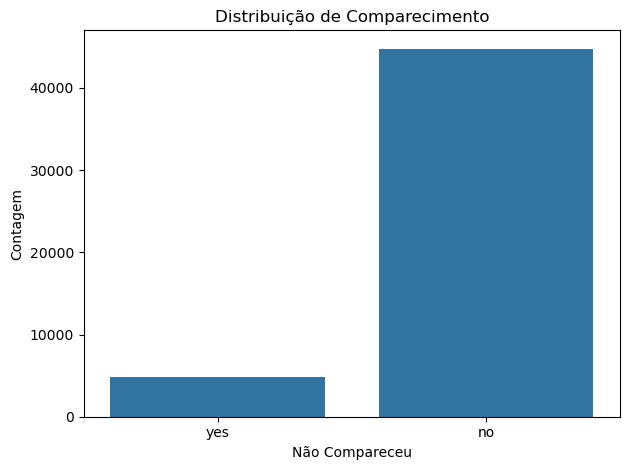

In [8]:
# Viualizando taxa geral de não comparecimento
print(df["nao_compareceu"].value_counts(normalize=True).round(2))

sns.countplot(data=df, x = "nao_compareceu")
plt.title("Distribuição de Comparecimento")
plt.xlabel("Não Compareceu")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

#### Observações

* 90% dos pacientes compareceram as consultas
* 1 em cada 10 pacientes nao compareceram as consultas


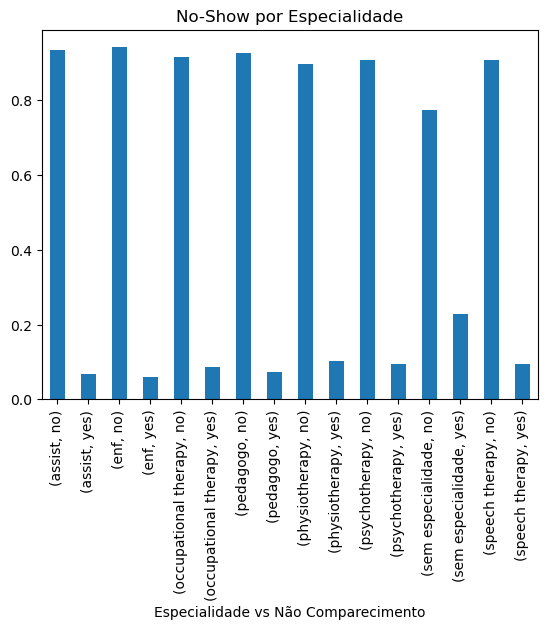

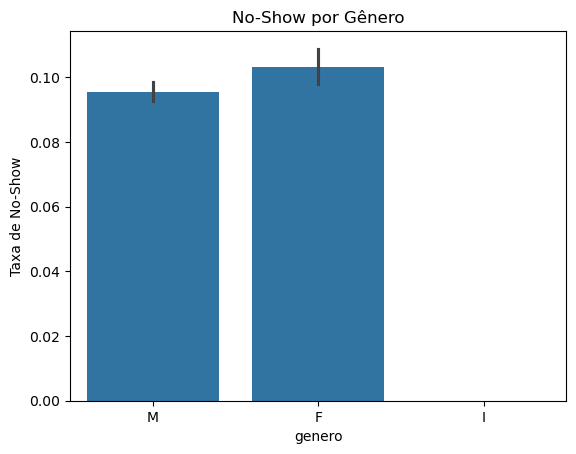

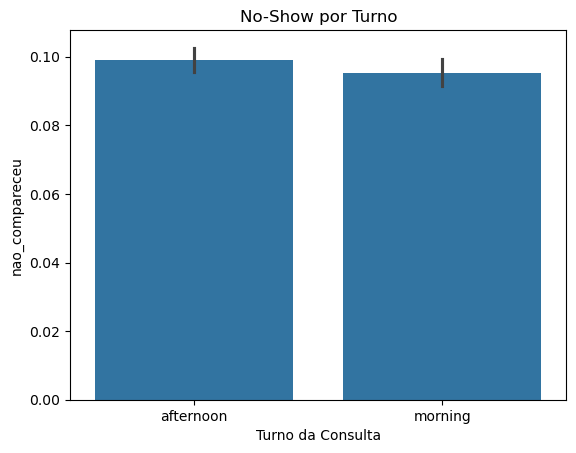

In [9]:
# Visualizando no-show por categoria

# Especialidade
taxa_no_show_especilidade = df.groupby("especialidade")['nao_compareceu'].value_counts(normalize=True)
taxa_no_show_especilidade.plot(kind='bar', stacked=True)
plt.title("No-Show por Especialidade")
plt.xlabel('Especialidade vs Não Comparecimento')
plt.show()

# Genero
sns.barplot(data=df, x = 'genero', y=df['nao_compareceu'].apply(lambda x: 1 if x.lower() == 'yes' else 0))
plt.title("No-Show por Gênero")
plt.ylabel("Taxa de No-Show")
plt.show()

# Turno da consulta
sns.barplot(data = df, x = 'turno_consulta', y=df['nao_compareceu'].apply(lambda x : 1 if x.lower() == 'yes' else 0))
plt.title("No-Show por Turno")
plt.xlabel("Turno da Consulta")
plt.show()

In [10]:
df['mes_consulta'].value_counts()

mes_consulta
oct      6282
aug      6021
july     5092
june     4999
sept     4672
mar      3981
april    3954
nov      3932
feb      3747
may      3710
dec      1907
jan      1296
Name: count, dtype: int64

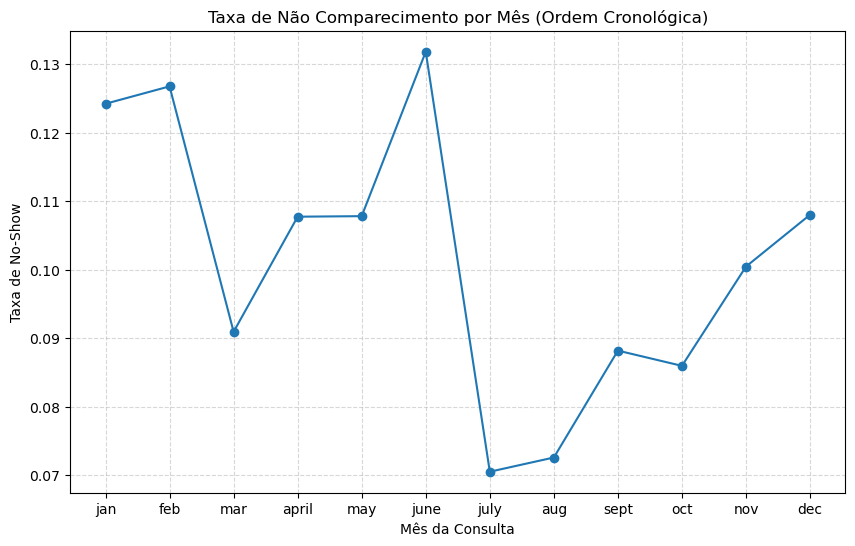

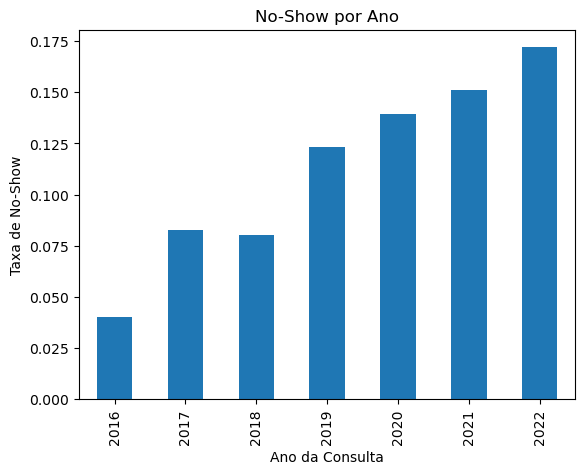

In [11]:
# Visualizando padrões temporais

# No-Show por mês
meses_ordem = ['jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
df['mes_consulta'] = pd.Categorical(df['mes_consulta'], categories=meses_ordem, ordered=True)
taxa_no_show_mes = df.groupby('mes_consulta', observed=False)['nao_compareceu'].apply(lambda x: (x == 'yes').mean())
taxa_no_show_mes = taxa_no_show_mes.reindex(meses_ordem)
plt.figure(figsize=(10, 6))
plt.plot(taxa_no_show_mes.index, taxa_no_show_mes.values, marker='o')
plt.title("Taxa de Não Comparecimento por Mês (Ordem Cronológica)")
plt.xlabel("Mês da Consulta")
plt.ylabel("Taxa de No-Show")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# No-Show por ano
df.groupby('ano_consulta')['nao_compareceu'].apply(lambda x : (x=='yes').mean()).sort_index().plot(kind = 'bar')
plt.title("No-Show por Ano")
plt.xlabel("Ano da Consulta")
plt.ylabel("Taxa de No-Show")
plt.show()

#### Observações

* Verificando a **Taxa de Comparecimento** comparada por **especialidade** nota-se um homogeniedade, menos em consultas que não possuem uma especialidade onde a taxa de **Não Comparecimento** foi maior cerca de 23%.
* O **Genêro** mostrou que a taxa de não comparecimento para ambos os grupos é relativamente baixa (próximo de 10%).
* O **Genêro** possuí um erro onde existe uma classificação "I", mas genêro so pode ser Masculino ou Feminino.
* Ambos os **Turnos da Consulta** apresentam uma taxa de não comparecimento em torno de 10%.
**Mês da Consulta (Sazonalidade):** Esta é uma variável preditiva forte. A taxa de não comparecimento apresenta alta variação sazonal, com picos em meses de férias e recesso, como:
    * **Picos de Alto Risco:** Janeiro ($\approx 12.4\%$), Fevereiro ($\approx 12.7\%$), Junho ($\approx 13.2\%$).
    * **Ponto Mínimo:** Julho ($\approx 7.0\%$), um *insight* contraintuitivo que merece investigação.
* **Ano da Consulta (Tendência):** Identificou-se uma **tendência crítica de crescimento** na taxa de não comparecimento.
    * A taxa **quase quadruplicou** de 2016 ($\approx 4\%$) para 2022 ($\approx 17.5\%$).
    * Esta tendência sugere que o problema de *no-show* está piorando anualmente e que as intervenções atuais são insuficientes. O aumento pode estar ligado a mudanças operacionais e/ou fatores externos (como o período de pandemia).

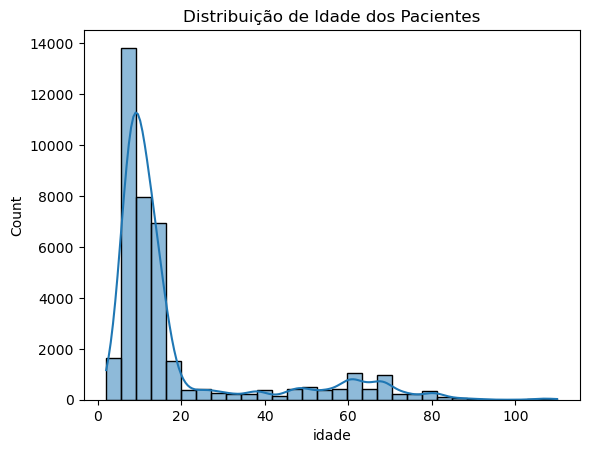

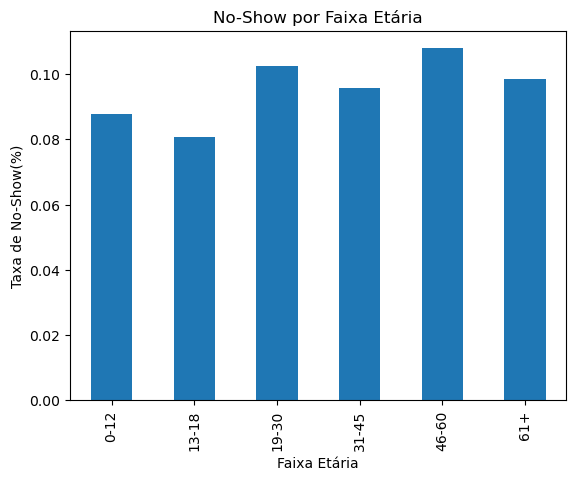

In [12]:
# Análise de idade e faixa etária

# Distribuição da idade
sns.histplot(df['idade'].dropna(), bins=30, kde= True)
plt.title("Distribuição de Idade dos Pacientes")
plt.show()

# No-Show por faixa etária
df['faixa_etaria'] = pd.cut(df['idade'], bins = [0,12,18,30,45,60,120], labels=['0-12','13-18','19-30','31-45','46-60','61+'])
df.groupby('faixa_etaria', observed=False)['nao_compareceu'].apply(lambda x: (x=='yes').mean()).plot(kind='bar')
plt.title("No-Show por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Taxa de No-Show(%)")
plt.show()

### Observações

* **Distribuição da População**: A distribuição etária apresenta um padrão bimodal, com um pico massivo de crianças pequenas (0–10 anos) e um segundo agrupamento de idosos (60–70 anos). O grupo de adolescentes e adultos jovens é o menos representado na amostra.
* **No-Show por Faixa Etária (Predição):** A faixa etária é um preditor significativo:
    * **Grupos de Maior Risco (Maior Taxa de No-Show):** O risco de falta é mais alto para pacientes de **19-30 anos** e, principalmente, de **46-60 anos** (Taxa $\approx 10.8\%$).
    * **Grupos de Menor Risco (Menor Taxa de No-Show):** Crianças e adolescentes (**0-18 anos**) demonstram a menor taxa de falta (Taxa $\approx 8.1\%$ a $8.8\%$), sugerindo alta adesão ao acompanhamento pediátrico.

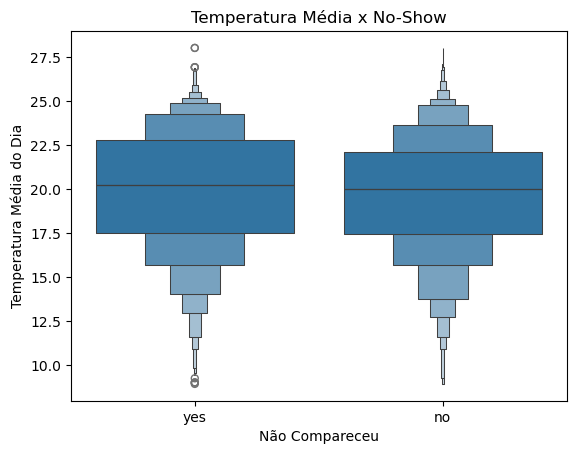

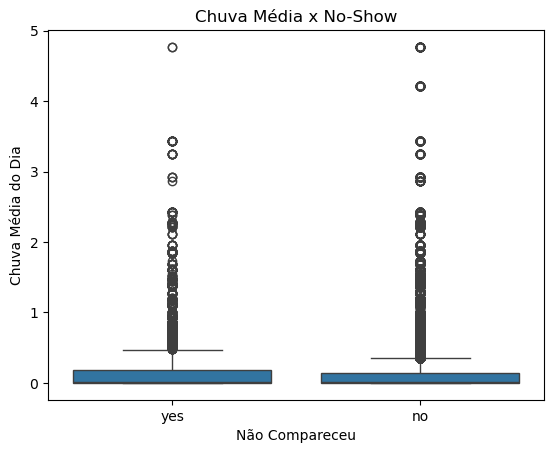

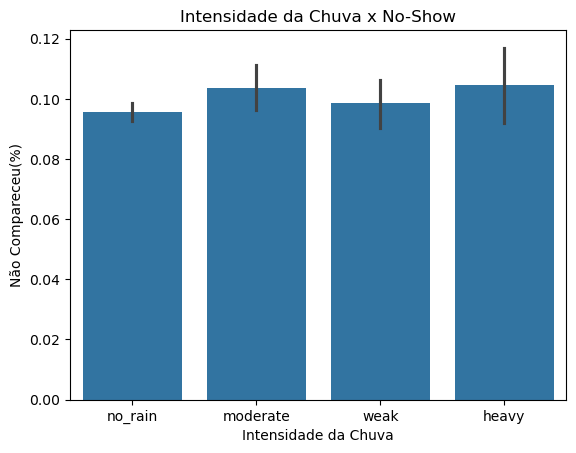

In [13]:
# Temperatura média x no-show
sns.boxenplot(x=df['nao_compareceu'], y=df['temperatura_media_dia'])
plt.title("Temperatura Média x No-Show")
plt.xlabel("Não Compareceu")
plt.ylabel("Temperatura Média do Dia")
plt.show()

# Chuva média x No-Show
sns.boxplot(x=df['nao_compareceu'], y=df['chuva_media_dia'])
plt.title("Chuva Média x No-Show")
plt.xlabel("Não Compareceu")
plt.ylabel("Chuva Média do Dia")
plt.show()

# Intensidade de chuva
sns.barplot(data=df, x='intensidade_chuva', y=df['nao_compareceu'].apply(lambda x: 1 if x=='yes' else 0))
plt.title("Intensidade da Chuva x No-Show")
plt.xlabel("Intensidade da Chuva")
plt.ylabel("Não Compareceu(%)")
plt.show()

#### Observações

* **Temperatura Média vs. No-Show:** As distribuições de temperatura média para os grupos que faltaram ('yes') e compareceram ('no') são **quase idênticas**. A mediana e os intervalos interquartis se sobrepõem.
* **Chuva Média e Intensidade vs. No-Show:** A **Chuva Média** e a **Intensidade da Chuva** (categorias: sem chuva, fraca, moderada, forte) também demonstram **baixo poder preditivo**.
    * A taxa de não comparecimento de $\approx 10\%$ permanece constante em todas as categorias de chuva.
    * As barras de erro se sobrepõem significativamente, indicando que a pequena variação observada não é estatisticamente relevante.

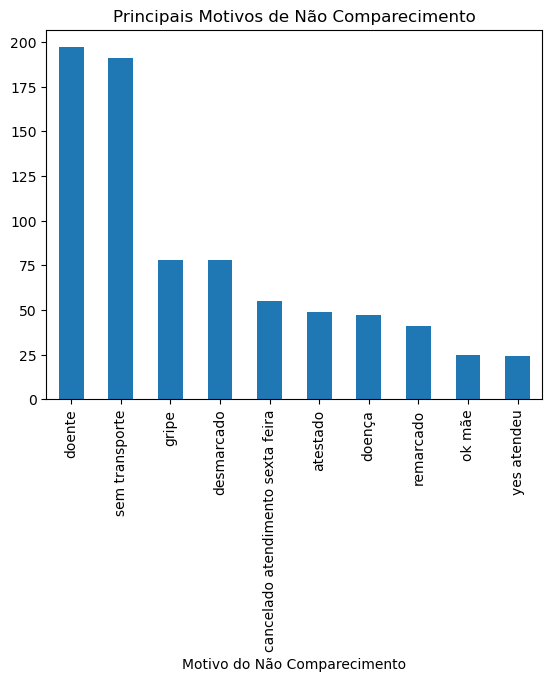

In [14]:
# Frequência de motivos
df['motivo_nao_comparecimento'].value_counts().head(10).plot(kind='bar')
plt.title("Principais Motivos de Não Comparecimento")
plt.xlabel("Motivo do Não Comparecimento")
plt.show()


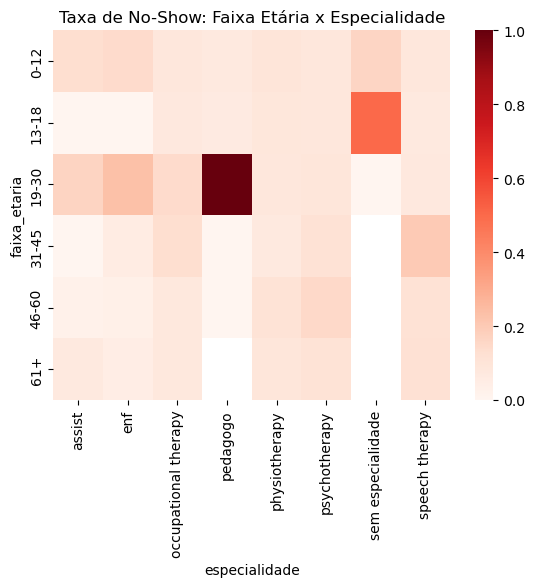

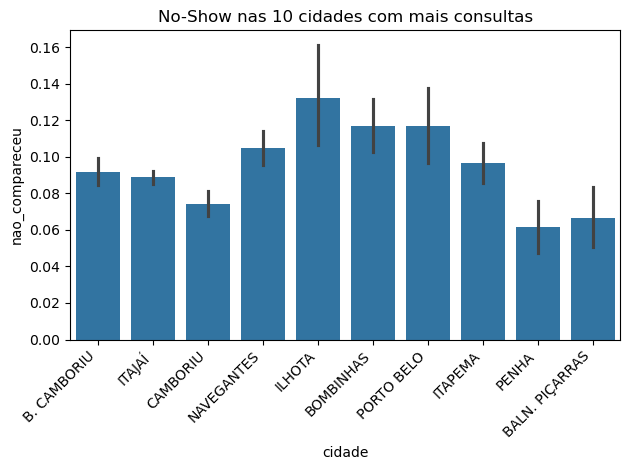

In [15]:
# No-Show por especialidade e faixa etária
sns.heatmap(df.pivot_table(index='faixa_etaria', columns='especialidade', values='nao_compareceu', observed=False,aggfunc=lambda x: (x=='yes').mean()), cmap='Reds')
plt.title("Taxa de No-Show: Faixa Etária x Especialidade")
plt.show()

# No-Show por cidade
top_cidades = df['cidade'].value_counts().head(10).index
sns.barplot(data=df[df['cidade'].isin(top_cidades)], x='cidade', y=df['nao_compareceu'].apply(lambda x: 1 if x=='yes' else 0))
plt.title("No-Show nas 10 cidades com mais consultas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
